### Target:
    
    - Making the model as light as possible.

### Results:

    - Model has 7781 parameters.

    - Train Accuracy = 99.11

    - Test Accuracy = 98.96

### Analysis:

    - Simple model gradually increasing channels to 32.

    - Overfitting reduced significantly. Even though test accuracy is less than train accuracy they are not diverging.

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [3]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: cuda


In [4]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [5]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [7]:
batch_size = 32

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [12]:
from model import Model3 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model3                                   [32, 1, 28, 28]           [32, 10]                  --                             --
├─Sequential: 1-1                        [32, 1, 28, 28]           [32, 10, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [32, 1, 28, 28]           [32, 9, 28, 28]           81                          1.04%
│    └─ReLU: 2-2                         [32, 9, 28, 28]           [32, 9, 28, 28]           --                             --
│    └─Conv2d: 2-3                       [32, 9, 28, 28]           [32, 10, 28, 28]          810                        10.41%
│    └─ReLU: 2-4                         [32, 10, 28, 28]          [32, 10, 28, 28]          --                             --
├─Sequential: 1-2                        [32, 10, 28, 28]          [32, 10, 14, 14]          --                

In [13]:
from utils import train, test

In [14]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.2561 Batch_id=1874 Average Loss=1.3787 Accuracy=49.08: 100%|██████████| 1875/1875 [00:27<00:00, 68.89it/s]


Test set: Average loss: 0.1904, Accuracy: 9403/10000 (94.03%)

Epoch 2


Train: Batch Loss=0.0703 Batch_id=1874 Average Loss=0.1621 Accuracy=95.03: 100%|██████████| 1875/1875 [00:26<00:00, 70.28it/s]


Test set: Average loss: 0.1168, Accuracy: 9642/10000 (96.42%)

Epoch 3


Train: Batch Loss=0.0275 Batch_id=1874 Average Loss=0.0980 Accuracy=97.01: 100%|██████████| 1875/1875 [00:27<00:00, 68.47it/s]


Test set: Average loss: 0.0875, Accuracy: 9738/10000 (97.38%)

Epoch 4


Train: Batch Loss=0.0268 Batch_id=1874 Average Loss=0.0751 Accuracy=97.64: 100%|██████████| 1875/1875 [00:29<00:00, 64.03it/s]


Test set: Average loss: 0.0562, Accuracy: 9821/10000 (98.21%)

Epoch 5


Train: Batch Loss=0.0057 Batch_id=1874 Average Loss=0.0591 Accuracy=98.15: 100%|██████████| 1875/1875 [00:27<00:00, 69.27it/s]


Test set: Average loss: 0.0548, Accuracy: 9830/10000 (98.30%)

Epoch 6


Train: Batch Loss=0.0651 Batch_id=1874 Average Loss=0.0525 Accuracy=98.36: 100%|██████████| 1875/1875 [00:26<00:00, 70.23it/s]


Test set: Average loss: 0.0569, Accuracy: 9822/10000 (98.22%)

Epoch 7


Train: Batch Loss=0.1221 Batch_id=1874 Average Loss=0.0470 Accuracy=98.59: 100%|██████████| 1875/1875 [00:26<00:00, 69.95it/s]


Test set: Average loss: 0.0524, Accuracy: 9848/10000 (98.48%)

Epoch 8


Train: Batch Loss=0.0075 Batch_id=1874 Average Loss=0.0432 Accuracy=98.67: 100%|██████████| 1875/1875 [00:26<00:00, 71.63it/s]


Test set: Average loss: 0.0389, Accuracy: 9865/10000 (98.65%)

Epoch 9


Train: Batch Loss=0.1556 Batch_id=1874 Average Loss=0.0389 Accuracy=98.84: 100%|██████████| 1875/1875 [00:26<00:00, 70.23it/s]


Test set: Average loss: 0.0377, Accuracy: 9881/10000 (98.81%)

Epoch 10


Train: Batch Loss=0.0017 Batch_id=1874 Average Loss=0.0363 Accuracy=98.88: 100%|██████████| 1875/1875 [00:27<00:00, 68.72it/s]


Test set: Average loss: 0.0605, Accuracy: 9804/10000 (98.04%)

Epoch 11


Train: Batch Loss=0.0002 Batch_id=1874 Average Loss=0.0351 Accuracy=98.91: 100%|██████████| 1875/1875 [00:26<00:00, 71.35it/s]


Test set: Average loss: 0.0433, Accuracy: 9879/10000 (98.79%)

Epoch 12


Train: Batch Loss=0.0097 Batch_id=1874 Average Loss=0.0320 Accuracy=98.99: 100%|██████████| 1875/1875 [00:26<00:00, 71.58it/s]


Test set: Average loss: 0.0360, Accuracy: 9884/10000 (98.84%)

Epoch 13


Train: Batch Loss=0.0391 Batch_id=1874 Average Loss=0.0307 Accuracy=99.01: 100%|██████████| 1875/1875 [00:25<00:00, 72.81it/s]


Test set: Average loss: 0.0345, Accuracy: 9889/10000 (98.89%)

Epoch 14


Train: Batch Loss=0.0566 Batch_id=1874 Average Loss=0.0293 Accuracy=99.05: 100%|██████████| 1875/1875 [00:26<00:00, 72.03it/s]


Test set: Average loss: 0.0399, Accuracy: 9881/10000 (98.81%)

Epoch 15


Train: Batch Loss=0.0616 Batch_id=1874 Average Loss=0.0283 Accuracy=99.11: 100%|██████████| 1875/1875 [00:26<00:00, 70.24it/s]


Test set: Average loss: 0.0309, Accuracy: 9896/10000 (98.96%)



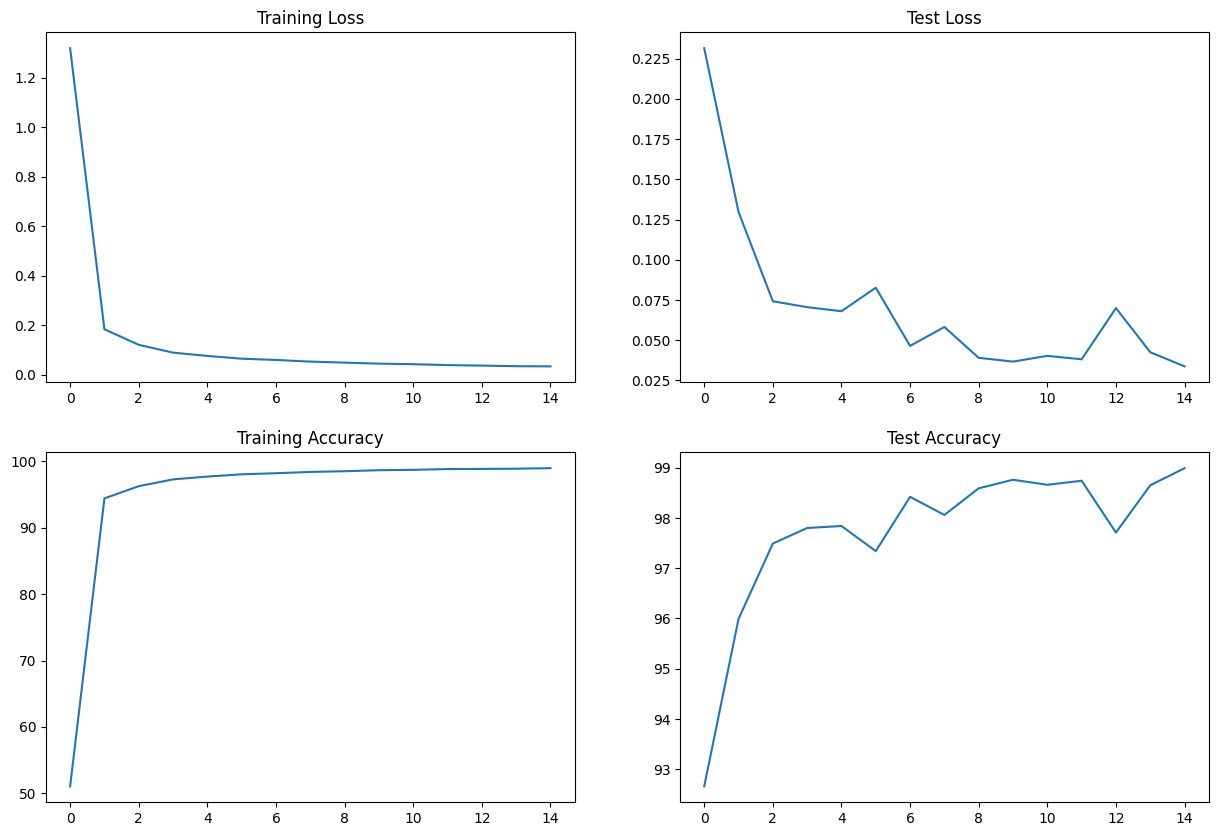

In [ ]:
from utils import plot_stats
plot_stats()

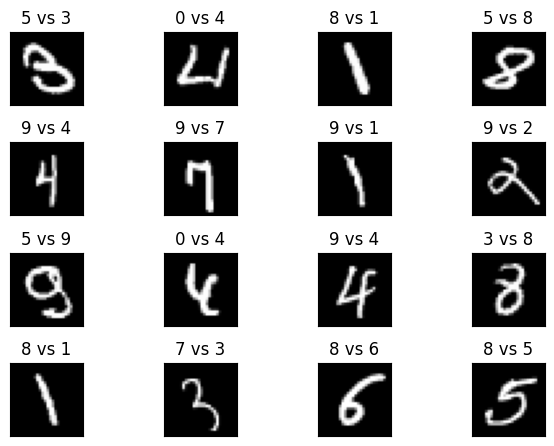

In [ ]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual